In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define function and its gradient
def f(x, y, mode='original'):
    if mode == 'original':
        return x**2 + 2*y**2
    else:
        return x**2 + y**2

def gradient(x, y, mode='original'):
    if mode == 'original':
        return np.array([2*x, 4*y])
    else:
        return np.array([2*x, 2*y])

In [8]:
# Gradient descent implementation
def gradient_descent(x0, y0, eta, mode="original", max_iters=100, tol=1e-6):
    point = np.array([x0, y0])
    history = [point.copy()]

    for i in range(max_iters):
        grad = gradient(point[0], point[1], mode)
        point_new = point - eta * grad
        history.append(point_new.copy())

        # print event 10 iterations
        if i % 10 == 0:
            print(
                f"Iteration {i}: (x, y) = ({point_new[0]:.6f}, {point_new[1]:.6f}), "
                f"f(x, y) = {f(point_new[0], point_new[1], mode):.6f}"
            )

        # Check convergence
        if np.linalg.norm(grad) < tol:
            print(
                f"Converged at iteration {i+1}: (x, y) = ({point_new[0]:.6f}, {point_new[1]:.6f}),  "
                f"f(x, y) =  {f(point_new[0],point_new[1], mode):.6f}"
            )
            break

        point = point_new
    return np.array(history)

In [9]:
# Run GD
x0, y0 = 4.0, 2.0
eta = 0.1
history = gradient_descent(x0, y0, eta, mode = 'original')

Iteration 0: (x, y) = (3.200000, 1.200000), f(x, y) = 13.120000
Iteration 10: (x, y) = (0.343597, 0.007256), f(x, y) = 0.118164
Iteration 20: (x, y) = (0.036893, 0.000044), f(x, y) = 0.001361
Iteration 30: (x, y) = (0.003961, 0.000000), f(x, y) = 0.000016
Iteration 40: (x, y) = (0.000425, 0.000000), f(x, y) = 0.000000
Iteration 50: (x, y) = (0.000046, 0.000000), f(x, y) = 0.000000
Iteration 60: (x, y) = (0.000005, 0.000000), f(x, y) = 0.000000
Iteration 70: (x, y) = (0.000001, 0.000000), f(x, y) = 0.000000
Converged at iteration 73: (x, y) = (0.000000, 0.000000),  f(x, y) =  0.000000


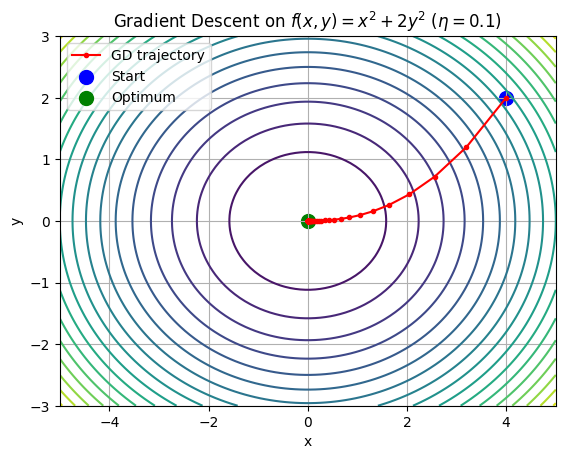

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, mode="original")
plt.contour(X, Y, Z, levels=20, cmap="viridis")

# Plot position of x in each step
plt.plot(history[:, 0], history[:, 1], "r.-", label="GD trajectory")
plt.scatter(history[0, 0], history[0, 1], color="blue", s=100, label="Start")
plt.scatter(0, 0, color="green", s=100, label="Optimum")

# Extra infor
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent on $f(x, y) = x^2 + 2y^2$ ($\\eta = 0.1$)")
plt.legend()
plt.grid(True)
plt.show()

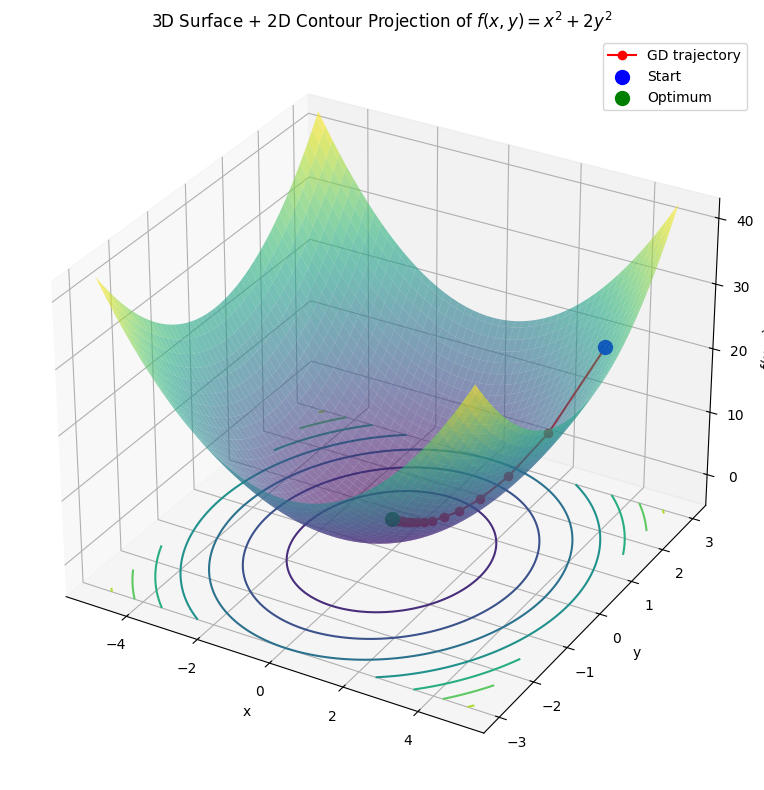

In [13]:
z_path = f(history[:, 0], history[:, 1])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

ax.contour(X, Y, Z, zdir='z', offset=np.min(Z)-5,cmap='viridis')

ax.plot(history[:, 0], history[:, 1], z_path, 'r.-', markersize=12, label='GD trajectory')
ax.scatter(history[0,0], history[0,1], z_path[0], color='blue', s=100, label='Start')
ax.scatter(0,0,0, color='green', s=100, label='Optimum')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface + 2D Contour Projection of $f(x, y) = x^2 +2y^2$')

ax.set_zlim(np.min(Z)-5, np.max(Z))
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
# Experiment with different learning rate
etas = [0.01, 0.4]
threshold = 0.01
print("\nConvergence speed comparison (||(x_t, y_t)|| < 0.01):")
for eta in etas:
    iters = 100
    print(f"Learning rate η = {eta}: {iters} iterations")


Convergence speed comparison (||(x_t, y_t)|| < 0.01):
Learning rate η = 0.01: 100 iterations
Learning rate η = 0.4: 100 iterations


In [16]:
history_mod = gradient_descent(x0, y0, eta=0.1, mode='modified')

Iteration 0: (x, y) = (3.200000, 1.600000), f(x, y) = 12.800000
Iteration 10: (x, y) = (0.343597, 0.171799), f(x, y) = 0.147574
Iteration 20: (x, y) = (0.036893, 0.018447), f(x, y) = 0.001701
Iteration 30: (x, y) = (0.003961, 0.001981), f(x, y) = 0.000020
Iteration 40: (x, y) = (0.000425, 0.000213), f(x, y) = 0.000000
Iteration 50: (x, y) = (0.000046, 0.000023), f(x, y) = 0.000000
Iteration 60: (x, y) = (0.000005, 0.000002), f(x, y) = 0.000000
Iteration 70: (x, y) = (0.000001, 0.000000), f(x, y) = 0.000000
Converged at iteration 73: (x, y) = (0.000000, 0.000000),  f(x, y) =  0.000000


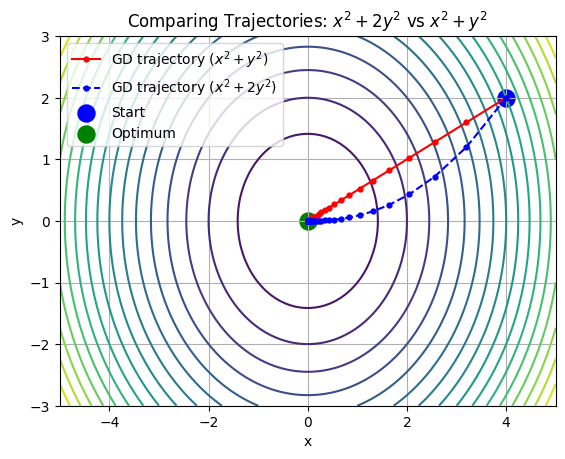

In [18]:
# Bonus Visualization
Z_mod = f(X, Y, mode='modified')
plt.contour(X, Y, Z_mod, levels=20, cmap='viridis')
plt.plot(history_mod[:, 0], history_mod[:, 1], 'r.-', markersize=7, label='GD trajectory ($x^2 + y^2$)')
plt.plot(history[:, 0], history[:, 1], 'b.--', markersize=7, label='GD trajectory ($x^2 + 2y^2$)')
plt.scatter(history[0, 0], history[0, 1], color='blue', s=150, label='Start')
plt.scatter(0, 0, color='green', s=150, label='Optimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing Trajectories: $x^2 + 2y^2$ vs $x^2 + y^2$')
plt.legend()
plt.grid(True)
plt.show()